From Scherbakov et al, 2006, Scherbakov et al, 2006, Light Scattering by Single Natural Ice Crystals

In [1]:
import sympy as sp
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
fontsize = 20

In [3]:
N_Q, N_W, N_G, Z, eta_W, sigma_G, sigma_Q, sigma_W = \
symbols('N_Q, N_W, N_G, Z, eta_W, sigma_G, sigma_Q, sigma_W')

In [4]:
rho_G = N_G*sp.exp(-Z**2/sigma_G**2)
display(rho_G)
print(rho_G)

N_G*exp(-Z**2/sigma_G**2)

N_G*exp(-Z**2/sigma_G**2)


In [5]:
rho_W = N_W*sp.exp(-(Z**2/sigma_W**2)**eta_W) * (Z**2/sigma_W**2)**(eta_W-1)
display(rho_W)
print(rho_W)

N_W*(Z**2/sigma_W**2)**(eta_W - 1)*exp(-(Z**2/sigma_W**2)**eta_W)

N_W*(Z**2/sigma_W**2)**(eta_W - 1)*exp(-(Z**2/sigma_W**2)**eta_W)


In [6]:
Z2_numerical = np.linspace(1e-5,12e-3,60)
Z_numerical = Z2_numerical**.5
sigma_G_numerical = 0.1
sigma_W_numerical = sigma_G_numerical

See here for subustitution syntax: https://stackoverflow.com/questions/32930284/how-to-substitute-multiple-symbols-in-an-expression-in-sympy

<IPython.core.display.Javascript object>


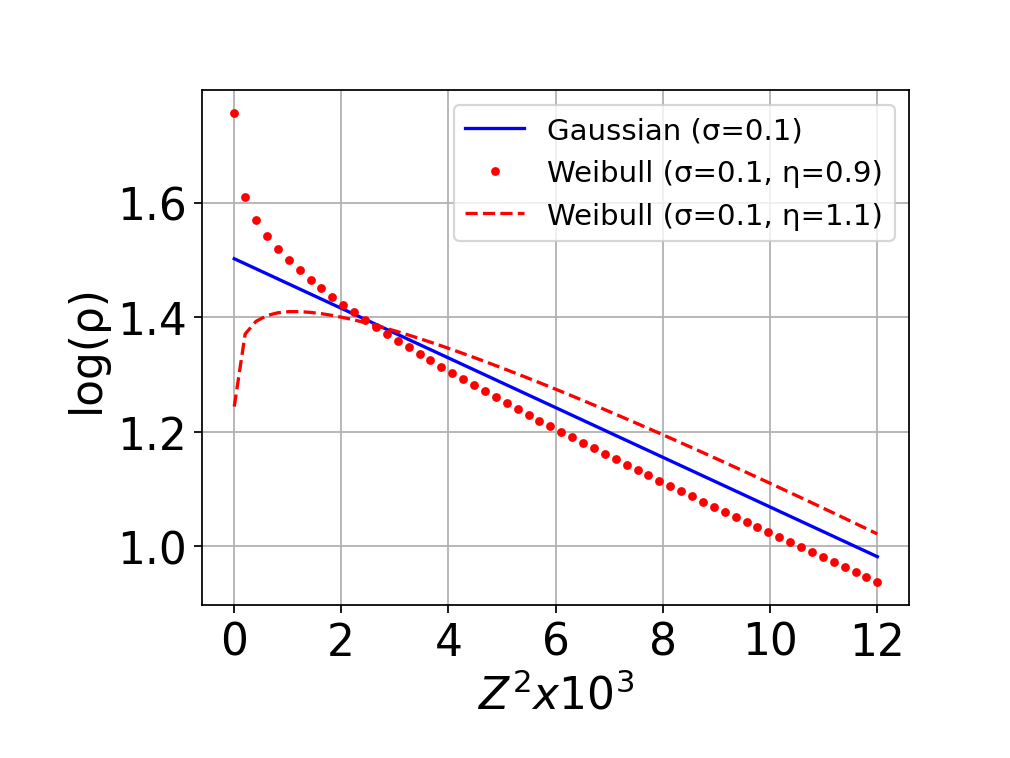

In [16]:
eta_W_numerical_G = 1
rho_G_numerical = rho_W.subs({N_W:eta_W/(sp.pi*sigma_W**2),sigma_W:sigma_G_numerical, sp.pi:np.pi, eta_W:eta_W_numerical_G})
rho_G_numerical_Z2 = np.zeros(np.shape(Z_numerical))
for i in range(len(Z2_numerical)):
    rho_G_numerical_Z2[i] = rho_G_numerical.subs(Z,Z_numerical[i])

eta_W_numerical_1 = 1.1
rho_W_numerical = rho_W.subs({N_W:eta_W/(sp.pi*sigma_W**2),sigma_W:sigma_W_numerical, sp.pi:np.pi, eta_W:eta_W_numerical_1})
rho_W_numerical_Z2_1 = np.zeros(np.shape(Z_numerical))
for i in range(len(Z2_numerical)):
    rho_W_numerical_Z2_1[i] = rho_W_numerical.subs(Z,Z_numerical[i])

eta_W_numerical_2 = 0.9
rho_W_numerical = rho_W.subs({N_W:eta_W/(sp.pi*sigma_W**2),sigma_W:sigma_W_numerical, sp.pi:np.pi, eta_W:eta_W_numerical_2})
rho_W_numerical_Z2_2 = np.zeros(np.shape(Z_numerical))
for i in range(len(Z2_numerical)):
    rho_W_numerical_Z2_2[i] = rho_W_numerical.subs(Z,Z_numerical[i])

# plt.semilogy(Z2_numerical*1e3,rho_G_numerical_Z2,'b-',label='Gaussian '+'(σ='+str(sigma_G_numerical)+')')
# plt.semilogy(Z2_numerical*1e3,rho_W_numerical_Z2_1,'r--',label='Weibull '+'(σ='+str(sigma_W_numerical)+', '+'η='+str(eta_W_numerical_1)+')')
# plt.semilogy(Z2_numerical*1e3,rho_W_numerical_Z2_2,'r.',label='Weibull '+'(σ='+str(sigma_W_numerical)+', '+'η='+str(eta_W_numerical_2)+')')
plt.plot(Z2_numerical*1e3,np.log10(rho_G_numerical_Z2),'b-',label='Gaussian '+'(σ='+str(sigma_G_numerical)+')')
plt.plot(Z2_numerical*1e3,np.log10(rho_W_numerical_Z2_2),'r.',label='Weibull '+'(σ='+str(sigma_W_numerical)+', '+'η='+str(eta_W_numerical_2)+')')
plt.plot(Z2_numerical*1e3,np.log10(rho_W_numerical_Z2_1),'r--',label='Weibull '+'(σ='+str(sigma_W_numerical)+', '+'η='+str(eta_W_numerical_1)+')')
plt.xlabel('$Z^2 x 10^3$',fontsize=fontsize)
plt.ylabel('log(ρ)',fontsize=fontsize)
plt.grid(True)
plt.legend(fontsize=fontsize/1.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplots_adjust(left=0.2, bottom=0.2)